<a href="https://colab.research.google.com/github/DerrickWijaya/Decision-Tree-with-Python/blob/main/Decision_Tree_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EXPLORING THE DATA

import pandas as pd
import numpy as np

coffeeData = pd.read_csv('/RRDinerCoffeeData.csv')
coffeeData.head()
coffeeData.shape
coffeeData.describe()


,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


In [ ]:
#Train/Test Splits

from sklearn.model_selection import train_test_split

#=====================================================
#digunakan untuk menghapus baris yang memiliki nilai kosong agar model tidak error saat dilatih.
NOPrediction = coffeeData.dropna()

#=====================================================
#memilih semua kolom kecuali Decision sebagai fitur.
#Fitur adalah kolom-kolom yang digunakan untuk memprediksi, sedangkan target adalah kolom yang ingin diprediksi
features = coffeeData.loc[:, coffeeData.columns != 'Decision']
features = features.columns

#=====================================================
X = NOPrediction[features]
y = NOPrediction['Decision']

#=====================================================
#scikit-learn membagi data menjadi 75% untuk pelatihan (X_train, y_train) dan 25% untuk pengujian (X_test, y_test)
#random_state=246 memastikan pembagian data konsisten setiap kali dijalankan.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 246)


/tmp/ipython-input-685319345.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


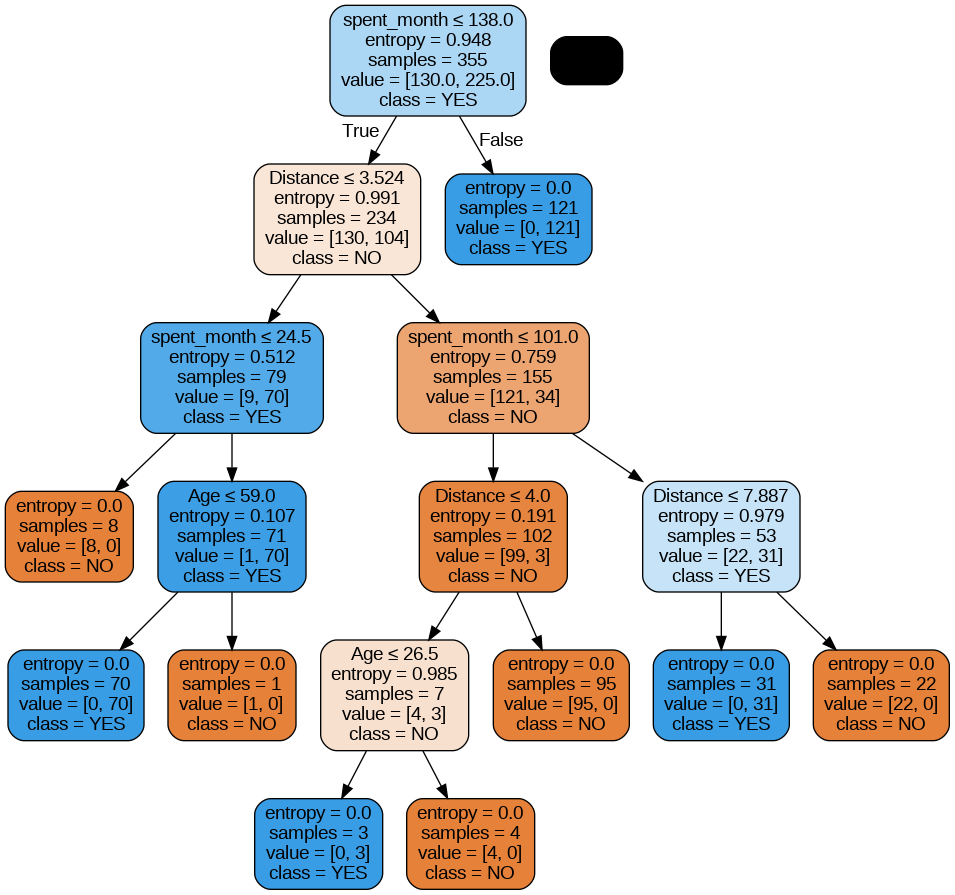

In [ ]:
#basic entropy model

# ===============================
# 1. Import Library
# ===============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from io import StringIO
import pydotplus

# ===============================
# 2. Load Data
# ===============================
coffeeData = pd.read_csv('/RRDinerCoffeeData.csv')

# Hapus baris kosong
coffeeData = coffeeData.dropna()

# ===============================
# 3. Pisahkan Feature dan Target
# ===============================
X = coffeeData.loc[:, coffeeData.columns != 'Decision']
y = coffeeData['Decision']

# ===============================
# 4. Encode Kolom Kategorikal
# ===============================
le = LabelEncoder()

# Encode semua kolom bertipe object (string)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Encode target juga kalau masih string
if y.dtype == 'object':
    y = le.fit_transform(y)

# ===============================
# 5. Split Data
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=246
)

# ===============================
# 6. Buat Model Decision Tree
# ===============================
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state=1234)
entr_model.fit(X_train, y_train)

# Prediksi data uji
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

# ===============================
# 7. Visualisasi Pohon Keputusan
# ===============================
dot_data = StringIO()
tree.export_graphviz(
    entr_model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X_train.columns,
    class_names=["NO", "YES"]  # ganti sesuai label kamu
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


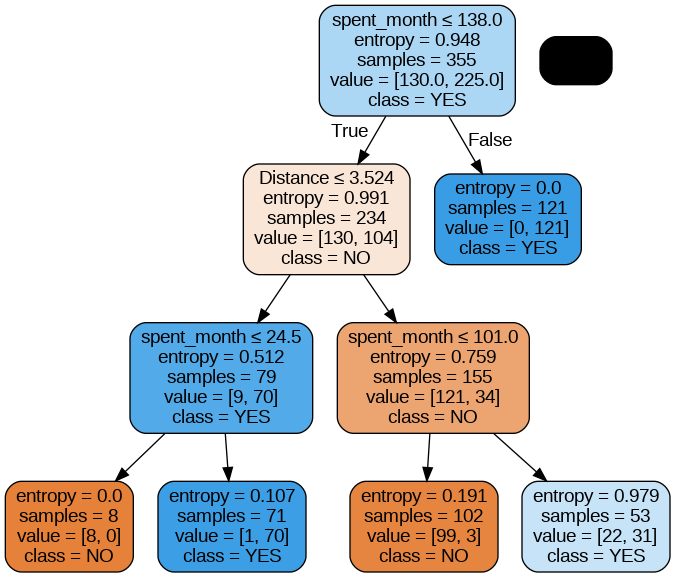

In [ ]:
#we set the maximum depth to 3

# ===============================
# 1. Import Library
# ===============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

# ===============================
# 2. Load dan Bersihkan Data
# ===============================
# Membaca dataset
coffeeData = pd.read_csv('/RRDinerCoffeeData.csv')

# Menghapus baris yang memiliki nilai kosong (NaN)
coffeeData = coffeeData.dropna()

# ===============================
# 3. Pisahkan Feature (X) dan Target (y)
# ===============================
X = coffeeData.loc[:, coffeeData.columns != 'Decision']
y = coffeeData['Decision']

# ===============================
# 4. Split Data menjadi Train dan Test
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=246
)

# ===============================
# 5. One-Hot Encoding
# ===============================
# Mengubah kolom kategorikal menjadi kolom numerik biner (0/1)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Menyamakan kolom antara train dan test (agar fitur sama persis)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# ===============================
# 6. Membangun Model Decision Tree
# ===============================
# Membatasi kedalaman pohon maksimal 3 agar tidak overfitting
entr_model2 = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=3, random_state=1234
)

# Melatih model dengan data training
entr_model2.fit(X_train_encoded, y_train)

# Melakukan prediksi pada data uji
y_pred = entr_model2.predict(X_test_encoded)
y_pred = pd.Series(y_pred)

# ===============================
# 7. Visualisasi Pohon Keputusan
# ===============================
dot_data = StringIO()

# Mengekspor struktur pohon ke format graphviz
tree.export_graphviz(
    entr_model2,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X_train_encoded.columns,
    class_names=['NO', 'YES']  # ubah jika label target berbeda
)

# Membuat grafik visual dari file dot
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Menampilkan gambar pohon
Image(graph.create_png())


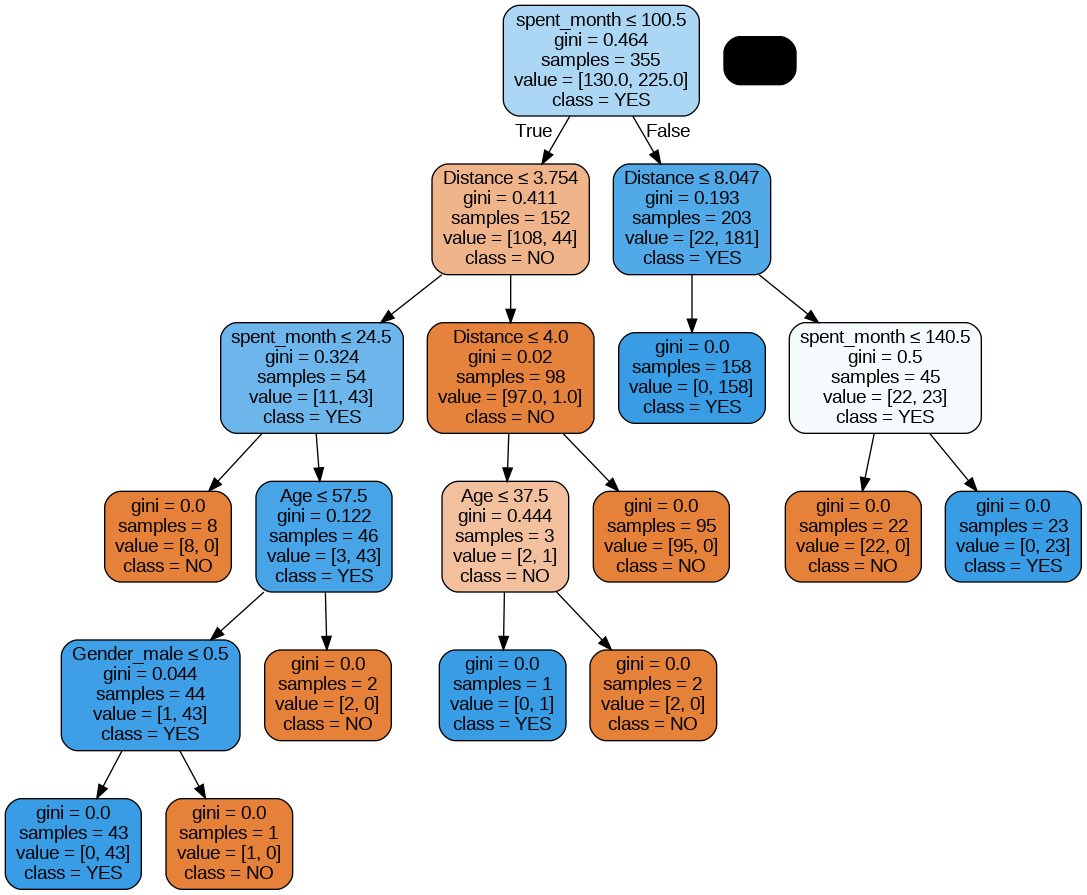

In [ ]:
#Gini Impurity Model

# ===============================
# 1. Import Library
# ===============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

# ===============================
# 2. Load dan Bersihkan Data
# ===============================
# Membaca dataset
coffeeData = pd.read_csv('/RRDinerCoffeeData.csv')

# Menghapus baris yang memiliki nilai kosong (NaN)
coffeeData = coffeeData.dropna()

# ===============================
# 3. Pisahkan Feature (X) dan Target (y)
# ===============================
X = coffeeData.loc[:, coffeeData.columns != 'Decision']
y = coffeeData['Decision']

# ===============================
# 4. Split Data menjadi Train dan Test
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=246
)

# ===============================
# 5. One-Hot Encoding
# ===============================
# Mengubah kolom kategorikal menjadi bentuk numerik biner (0/1)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Menyamakan kolom agar X_train dan X_test punya struktur yang sama
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# ===============================
# 6. Gini Impurity Model
# ===============================
# Model Decision Tree dengan kriteria pemisahan "gini"
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state=1234)

# Melatih model dengan data training
gini_model.fit(X_train_encoded, y_train)

# Melakukan prediksi terhadap data test
y_pred = gini_model.predict(X_test_encoded)

# Menyimpan hasil prediksi ke dalam Series
y_pred = pd.Series(y_pred)

# ===============================
# 7. Visualisasi Pohon Keputusan
# ===============================
dot_data = StringIO()

# Mengekspor model ke format graphviz
tree.export_graphviz(
    gini_model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X_train_encoded.columns,
    class_names=["NO", "YES"]  # ubah sesuai label target kamu
)

# Membuat grafik dari file dot
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Menampilkan gambar pohon keputusan
Image(graph.create_png())


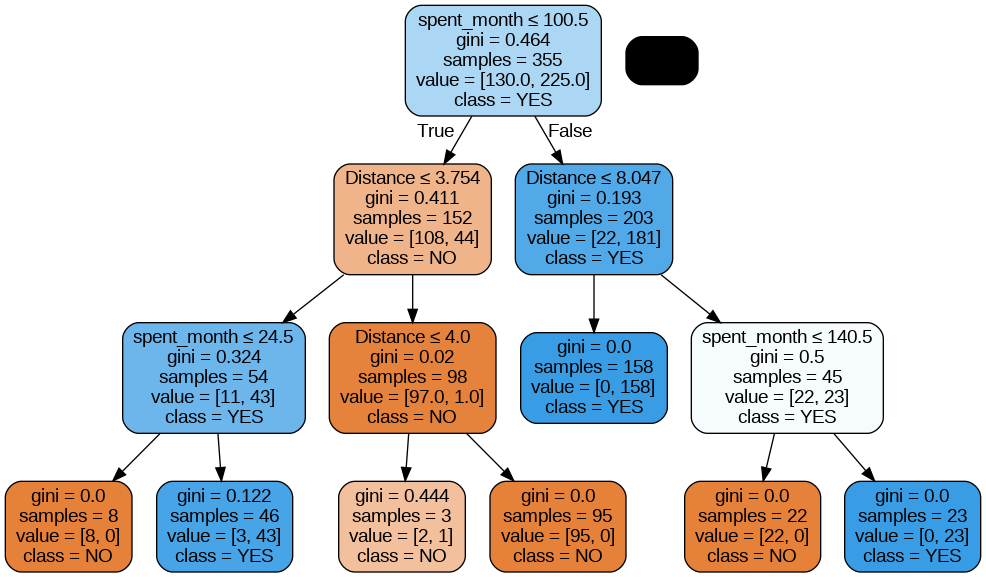

In [ ]:
#set a maximum depth for Gini decision trees.

# ===============================
# 1. Import Library
# ===============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

# ===============================
# 2. Load dan Bersihkan Data
# ===============================
# Membaca dataset
coffeeData = pd.read_csv('/RRDinerCoffeeData.csv')

# Menghapus baris yang memiliki nilai kosong
coffeeData = coffeeData.dropna()

# ===============================
# 3. Pisahkan Feature (X) dan Target (y)
# ===============================
X = coffeeData.loc[:, coffeeData.columns != 'Decision']
y = coffeeData['Decision']

# ===============================
# 4. Split Data Menjadi Train dan Test
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=246
)

# ===============================
# 5. One-Hot Encoding
# ===============================
# Mengubah kolom kategorikal menjadi bentuk numerik biner (0/1)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Menyamakan struktur kolom antara data train dan test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# ===============================
# 6. Gini Model dengan Max Depth = 3
# ===============================
# Membuat model Decision Tree dengan kriteria Gini dan kedalaman maksimum 3
gini_model2 = tree.DecisionTreeClassifier(
    criterion='gini', random_state=1234, max_depth=3
)

# Melatih model dengan data training
gini_model2.fit(X_train_encoded, y_train)

# Melakukan prediksi pada data uji
y_pred = gini_model2.predict(X_test_encoded)
y_pred = pd.Series(y_pred)

# ===============================
# 7. Visualisasi Pohon Keputusan
# ===============================
dot_data = StringIO()

# Mengekspor struktur pohon ke format .dot
tree.export_graphviz(
    gini_model2,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X_train_encoded.columns,
    class_names=['NO', 'YES']  # ubah sesuai label target kamu
)

# Membuat grafik pohon dari data .dot
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Menampilkan pohon keputusan
Image(graph.create_png())


In [ ]:
# Display statistical summary of numerical columns
display(coffeeData.describe())

# Display DataFrame structure and data types
display(coffeeData.info())

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,35.417722,2.590717,32.592827,106.727848,44731.892405,5.102898,0.512658,0.639241
std,13.604135,1.585211,15.758109,56.101085,25567.674430,3.354891,0.500368,0.480728
min,16.000000,0.000000,0.000000,0.000000,3150.000000,0.003168,0.000000,0.000000
25%,25.000000,1.000000,24.000000,60.000000,27284.250000,2.077965,0.000000,0.000000
50%,29.000000,3.000000,35.000000,113.500000,42791.500000,4.832168,1.000000,1.000000
75%,49.000000,4.000000,43.000000,150.000000,61621.750000,7.869086,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,172658.000000,10.986203,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      474 non-null    int64  
 1   Gender                   474 non-null    object 
 2   num_coffeeBags_per_year  474 non-null    int64  
 3   spent_week               474 non-null    int64  
 4   spent_month              474 non-null    int64  
 5   SlrAY                    474 non-null    int64  
 6   Distance                 474 non-null    float64
 7   Online                   474 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 37.0+ KB


None